<a href="https://colab.research.google.com/github/FarrasNayan321/UASML/blob/main/UAS_ML_NO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix, r2_score
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


# Read csv File

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/FarrasNayan321/UASML/main/knn_datasets.csv')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,3,126,88.0,41,235,39.3,0.704,27,0
1,8,99,84.0,0,0,35.4,0.388,50,0
2,7,196,90.0,0,0,39.8,0.451,41,1
3,9,119,80.0,35,0,29.0,0.263,29,1
4,11,143,94.0,33,146,36.6,0.254,51,1
...,...,...,...,...,...,...,...,...,...
475,6,166,74.0,0,0,26.6,0.304,66,0
476,5,110,68.0,0,0,26.0,0.292,30,0
477,2,81,72.0,15,76,30.1,0.547,25,0
478,7,195,70.0,33,145,25.1,0.163,55,1


# Checking NULL data

In [18]:
df.isnull().sum()

X1    0
X2    0
X3    1
X4    0
X5    0
X6    0
X7    0
X8    0
X9    0
dtype: int64

# Dropping NULL data

In [19]:
df1 = df.dropna()
df1

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,3,126,88.0,41,235,39.3,0.704,27,0
1,8,99,84.0,0,0,35.4,0.388,50,0
2,7,196,90.0,0,0,39.8,0.451,41,1
3,9,119,80.0,35,0,29.0,0.263,29,1
4,11,143,94.0,33,146,36.6,0.254,51,1
...,...,...,...,...,...,...,...,...,...
475,6,166,74.0,0,0,26.6,0.304,66,0
476,5,110,68.0,0,0,26.0,0.292,30,0
477,2,81,72.0,15,76,30.1,0.547,25,0
478,7,195,70.0,33,145,25.1,0.163,55,1


In [20]:
df1.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
X9    0
dtype: int64

# Correlation matrix

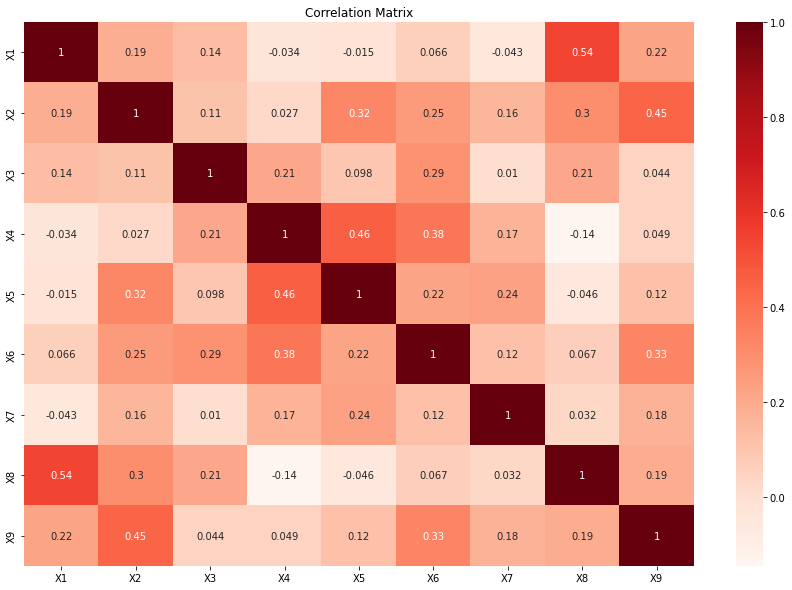

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=df1.corr(), annot=True, cmap = "Reds")
plt.title("Correlation Matrix")

plt.show()

## Karena X2 paling tinggi korelasinya dengan X9 jadi kita drop sisanya

In [22]:
df_new = df1.drop(['X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], axis=1)
df_new.head()

,X2,X9
0,126,0
1,99,0
2,196,1
3,119,1
4,143,1


## Splliting Data 3 : 1

In [23]:
sc = StandardScaler()
X = df_new.drop('X9',axis=1)
x_transformed = sc.fit_transform(X)
y = df_new['X9']
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)


In [24]:
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

In [25]:
class KNNClassificationEuclidian:
  def __init__(self, k):
    self.k = k
  
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    y_pred = [self._predict(x_test) for x_test in X_test]
    return np.array(y_pred)

  def _predict(self, x_test):
    dist = [euclidean(x_test, x_train) for x_train in self.X_train]
    k_nearest = np.argsort(dist)[:self.k]
    k_nearest_class = [self.y_train[i] for i in k_nearest]
    most_common = Counter(k_nearest_class).most_common(1)
    return most_common[0][0]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

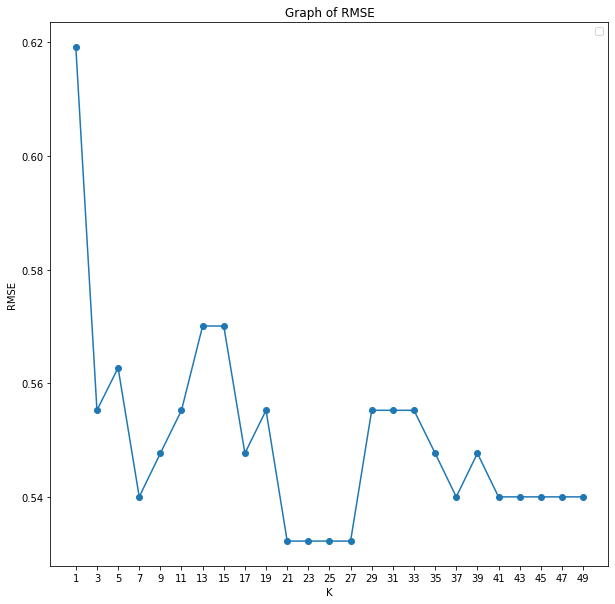

In [26]:
rmse_values = []
k_num = []
for k in range(1, 50, 2):
  model = KNNClassificationEuclidian(k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  k_num.append(k)
  rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 10))
plt.plot(k_num, rmse_values, "o-")
plt.title("Graph of RMSE")
plt.xticks(np.arange(1, 50, 2.0))
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

## Karena K paling rendah 21-27 jadi saya pake 27 saja

In [28]:
model = KNNClassificationEuclidian(27)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.7166666666666667
0.5322906474223771


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80        78
           1       0.67      0.33      0.44        42

    accuracy                           0.71       120
   macro avg       0.69      0.62      0.62       120
weighted avg       0.70      0.71      0.68       120



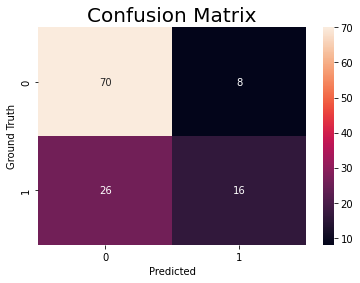

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.title("Confusion Matrix", fontsize=20)
plt.show()